#Giorgio Mendoza
#CS539-F23-F02
Dr. J. Sethi

# LAB 1-3


## The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. (Don't worry about being wrong. You will earn full credit for any justified answer.)

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

In this case, you can consider any random data set or all data in all of existence or a single particular dataset (like the S&P 500 dataset we'll examine later in the lab). Any one of those should be fine as there's no wrong answer for this question, as indicated above, and it's just a way to guide and see your thinking.

**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The [CSV file](https://raw.githubusercontent.com/dlsun/data-science-book/master/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/sp500.txt'
sp500_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
#print(sp500_data.head())
#print(sp500_data)
# Set 'Name' as the index of the DataFrame
sp500_data.set_index('Name', inplace=True)

# Display the DataFrame with the new index
print(sp500_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            date     open    close    volume
Name                                        
AAL   2018-02-01   $54.00   $53.88   3623078
AAPL  2018-02-01  $167.16  $167.78  47230787
AAP   2018-02-01  $116.24  $117.29    760629
ABBV  2018-02-01  $112.24  $116.34   9943452
ABC   2018-02-01   $97.74   $99.29   2786798
...          ...      ...      ...       ...
XYL   2018-02-01   $72.50   $74.84   1817612
YUM   2018-02-01   $84.24   $83.98   1685275
ZBH   2018-02-01  $126.35  $128.19   1756300
ZION  2018-02-01   $53.79   $54.98   3542047
ZTS   2018-02-01   $76.84   $77.82   2982259

[505 rows x 4 columns]


**Answer 1. **At first, I assumed that the percentage of values starting with 1 would be high compared to those starting with 9, due to the natural order of numbers, where sequences typically start from 1. I estimated this percentage to be around 30% to 40% for the digit 1, especially when including decimal numbers. For the digit 9, I expected a much smaller percentage, like 2% or 3%. After researching, I discovered Benford's Law, which provides a precise logarithmic formula, log10(1+1/d).

This law, based on the natural order of numbers and inclusive of decimals, suggests about 30.1% of values would start with 1 and around 4.6% with 9. This law somewhat aligns with my initial assumptions.

**Answer 2.** For the last digit of numbers in a dataset, I assume a uniform distribution, where each digit from 0 to 9 is equally likely, at about 10% each. This is because the last digits are typically random and not influenced by the same factors as first digits.

**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

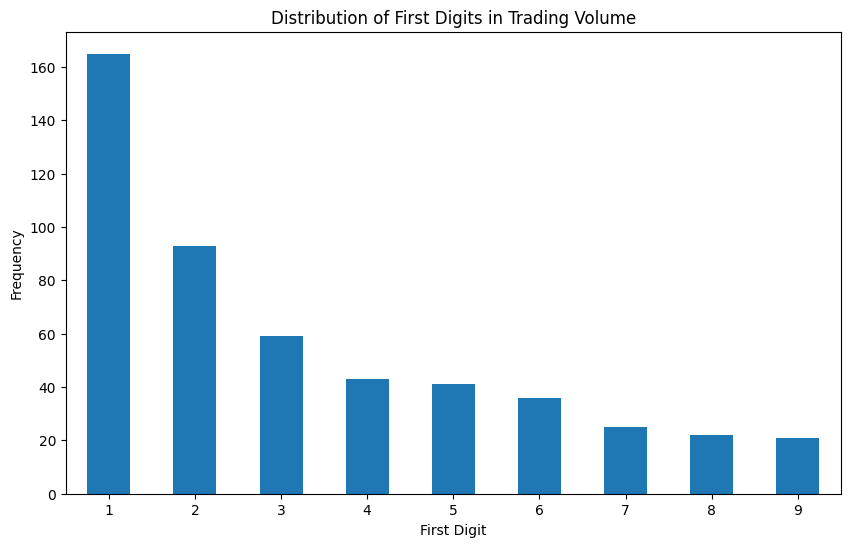

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data and set 'Name' as the index
sp500_data = pd.read_csv(file_path)
sp500_data.set_index('Name', inplace=True)

# Convert the 'volume' column to strings
sp500_data['volume_str'] = sp500_data['volume'].astype(str)

# Extract the first digit from each string
sp500_data['first_digit'] = sp500_data['volume_str'].str[0]

# Count the frequency of each first digit
first_digit_counts = sp500_data['first_digit'].value_counts().sort_index()

# Visualization
plt.figure(figsize=(10, 6))
first_digit_counts.plot(kind='bar')
plt.title('Distribution of First Digits in Trading Volume')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


The bar chart above shows the distribution of first digits in the trading volumes of S&P 500 companies, and it aligns with the predictions I made based on Benford's Law. The number 1 appears as the first digit most frequently, with the frequency of occurrence decreasing for larger digits, which confirms the expected logarithmic pattern of Benford's Law.



**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

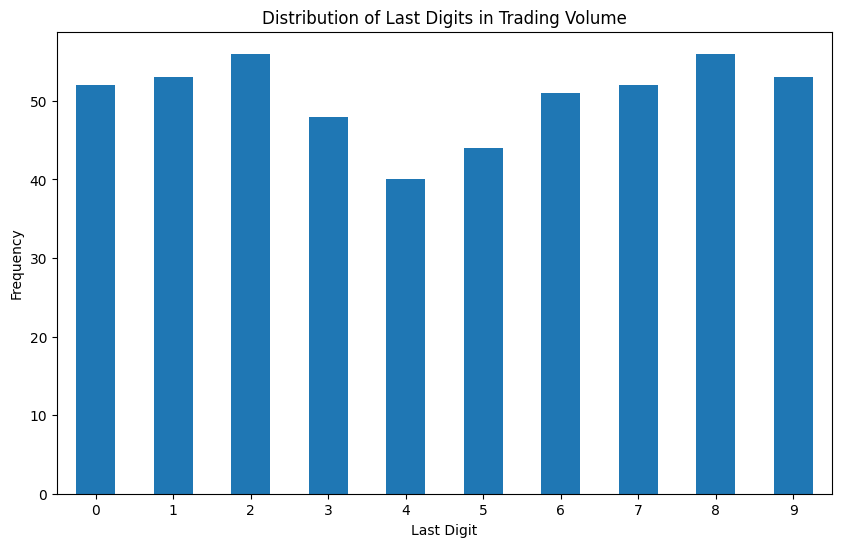

In [ ]:
sp500_data['last_digit'] = sp500_data['volume_str'].str[-1]

# Count the frequency of each last digit
last_digit_counts = sp500_data['last_digit'].value_counts().sort_index()

# Visualization
plt.figure(figsize=(10, 6))
last_digit_counts.plot(kind='bar')
plt.title('Distribution of Last Digits in Trading Volume')
plt.xlabel('Last Digit')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

The chart above shows a uniform distribution of last digits in trading volumes, consistent with the uniform distribution predicted earlier, and confirms that Benford's Law does not apply to the last digits.

**ENTER YOUR WRITTEN EXPLANATION HERE.**

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

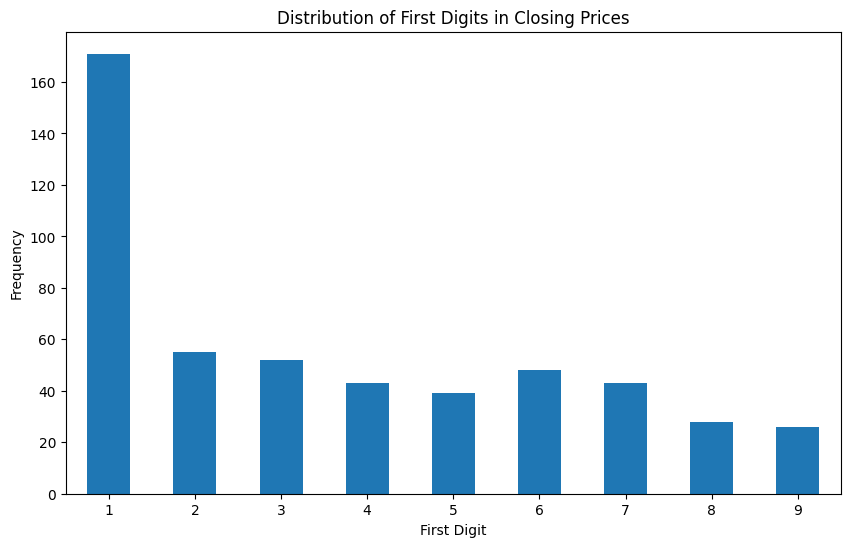

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already read the data and it's stored in `sp500_data`

# Remove the dollar sign from the 'close' column and convert it to a float
sp500_data['close_clean'] = sp500_data['close'].replace('[\$,]', '', regex=True).astype(float)

# Convert the cleaned 'close' column to strings
sp500_data['close_str'] = sp500_data['close_clean'].astype(str)

# Extract the first digit from each string in the 'close_str' column
sp500_data['first_digit_close'] = sp500_data['close_str'].str[0]

# Count the frequency of each first digit
first_digit_counts_close = sp500_data['first_digit_close'].value_counts().sort_index()

# Visualization
plt.figure(figsize=(10, 6))
first_digit_counts_close.plot(kind='bar')
plt.title('Distribution of First Digits in Closing Prices')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

# Submission Instructions

Once you have filled out the Colab notebook completely, you are ready to submit. Your final submission will consist of the `.ipynb` and the `.pdf` files, as described below:

1. Download the Google Colab notebook as an iPython notebook
   * You can do this by going to *File \> Download .ipynb*
2. Print out a PDF of your Colab notebook.
   * In Google Chrome, you can do this by going to *File \> Print* and then choosing *Save to PDF*.
   * **Make sure you have run all cells first.**
   * Ensure you've closed the table of contents sidebar before you print so we can easily see your work and output.
3. Submit **both** the `.ipynb` notebook and the `.pdf` files via Blackboard or directly via the cloud using the Google Integration with Blackboard (if applicable).

---